In [14]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px


In [3]:
card_df = pd.read_csv('card_transdata.csv')

card_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
card_df = card_df.astype({'repeat_retailer': int, 'used_chip': int, 'used_pin_number': int, 'online_order': int, 'fraud': int})

In [6]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [7]:
card_df.min()

distance_from_home                0.004874
distance_from_last_transaction    0.000118
ratio_to_median_purchase_price    0.004399
repeat_retailer                   0.000000
used_chip                         0.000000
used_pin_number                   0.000000
online_order                      0.000000
fraud                             0.000000
dtype: float64

In [8]:
fraud_card_df = card_df[card_df['fraud'] == 1]
not_fraud_card_df = card_df[card_df['fraud'] == 0]

fraud_card_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1,0,0,1,1
24,3.803057,67.241081,1.872950,1,0,0,1,1
29,15.694986,175.989182,0.855623,1,0,0,1,1
35,26.711462,1.552008,4.603601,1,1,0,1,1
36,10.664474,1.565769,4.886521,1,0,0,1,1


Text(0, 0.5, 'Distance from Home (Log-Scale)')

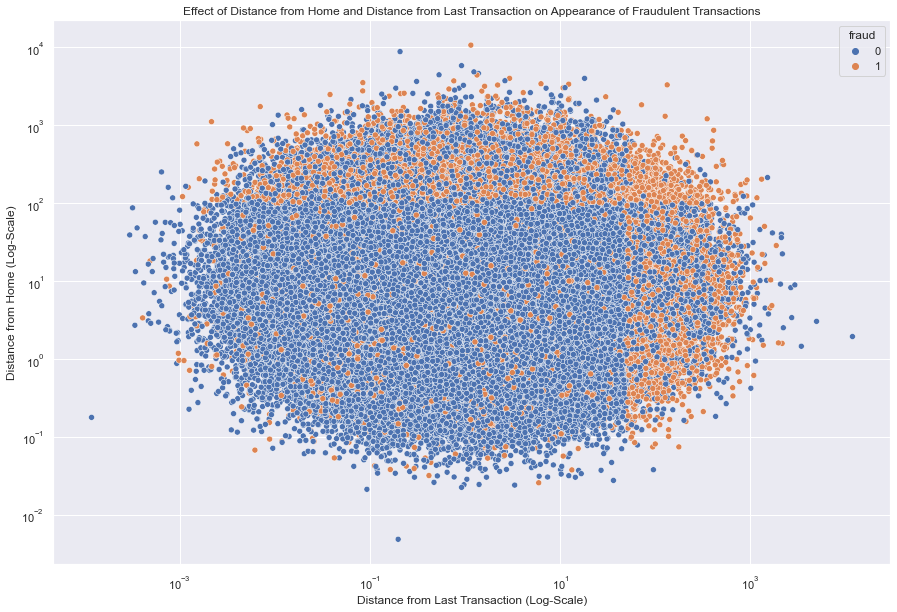

In [17]:
sns.set(rc={'figure.figsize':(15,10)})

scatter = sns.scatterplot(data=card_df, x='distance_from_last_transaction', y='distance_from_home', hue='fraud')

scatter.set(xscale='log', yscale='log')
plt.title('Effect of Distance from Home and Distance from Last Transaction on Appearance of Fraudulent Transactions')
plt.xlabel('Distance from Last Transaction (Log-Scale)')
plt.ylabel('Distance from Home (Log-Scale)')

In [10]:
fraud_card_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.000000,87403.0
mean,66.261876,12.712185,6.006323,0.880119,0.256399,0.003123,0.946318,1.0
std,134.391608,47.997697,5.564320,0.324825,0.436647,0.055801,0.225391,0.0
min,0.025847,0.000407,0.011966,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.585729,0.328199,3.500270,1.000000,0.000000,0.000000,1.000000,1.0
50%,15.454219,1.157631,5.071294,1.000000,0.000000,0.000000,1.000000,1.0
75%,101.110104,4.598504,7.331222,1.000000,1.000000,0.000000,1.000000,1.0
max,10632.723672,2160.499922,266.689692,1.000000,1.000000,1.000000,1.000000,1.0


In [11]:
not_fraud_card_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.000000,912597.0
mean,22.832976,4.301391,1.423642,0.881672,0.359402,0.109944,0.622225,0.0
std,52.828655,22.472359,1.946152,0.322997,0.479825,0.312821,0.484831,0.0
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.828942,0.293859,0.449768,1.000000,0.000000,0.000000,0.000000,0.0
50%,9.673847,0.985074,0.913950,1.000000,0.000000,0.000000,1.000000,0.0
75%,24.158057,3.268578,1.788918,1.000000,1.000000,0.000000,1.000000,0.0
max,8777.136420,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,0.0


In [12]:
card_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 0, 'Ratio to Median Purchase Price (Log-Scale)')

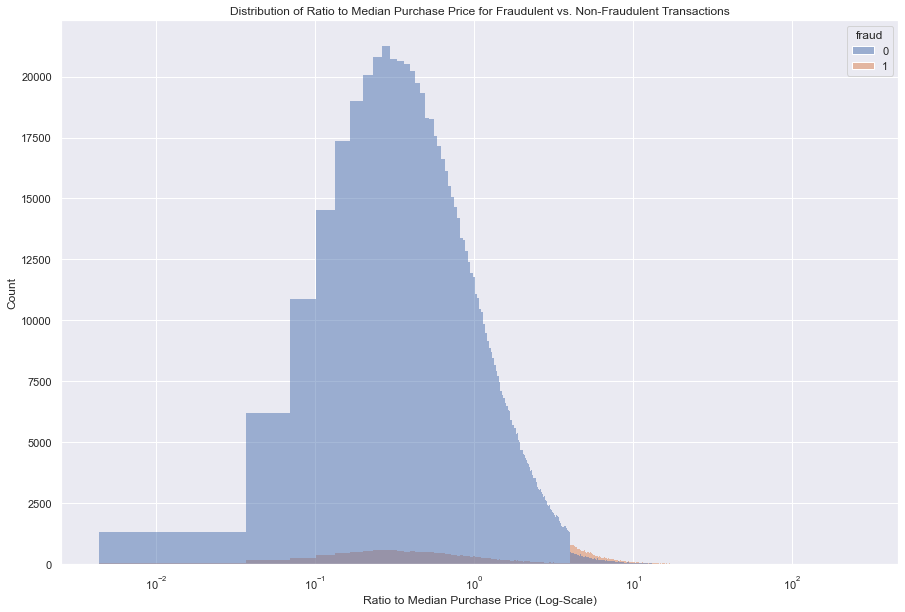

In [20]:
hist = sns.histplot(data=card_df, x='ratio_to_median_purchase_price', hue='fraud')

hist.set(xscale='log')
plt.title('Distribution of Ratio to Median Purchase Price for Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Ratio to Median Purchase Price (Log-Scale)')

[None, None]

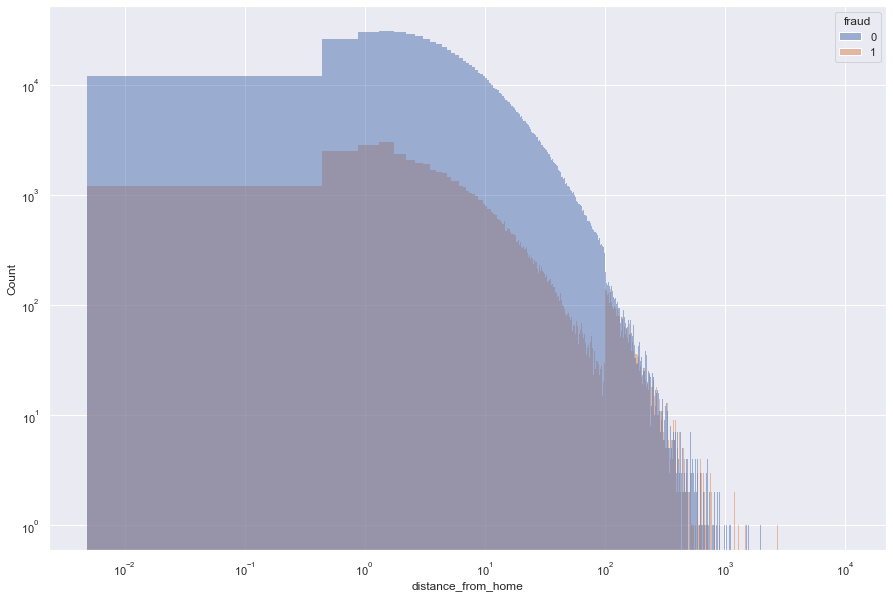

In [ ]:
hist = sns.histplot(data=card_df, x='distance_from_home', hue='fraud')

hist.set(xscale='log', yscale='log')
plt.title('Distribution of Distance from Home Values for Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Ratio to Median Purchase Price (Log-Scale)')